In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

# Load merged and encoded datasets.
df_encoded = pd.read_csv('/content/drive/MyDrive/diploma/df_encoded.csv')
combined_data = pd.read_csv('/content/drive/MyDrive/diploma/merged_data.csv')

In [4]:
import pickle
with open('/content/drive/MyDrive/diploma/scale.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Splitting into test train validation datasets

In [6]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('salary', axis=1)
y = df_encoded['salary']

# divide the data into a training set and a test and validation set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=1)

# divide the test and validation set into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=1)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")


Training set: (14766, 97), (14766,)
Validation set: (1846, 97), (1846,)
Test set: (1846, 97), (1846,)


# RandomForestRegressor

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import learning_curve, KFold

# Define parameters for RandomForestRegressor
params = {
    'n_estimators': 500,
    'min_samples_split': 15,
    'min_samples_leaf': 2,
    'max_features': 0.5,
    'max_depth': 20
}

# Initialize the model
rf_model = RandomForestRegressor(**params)

# Function to calculate regression metrics
def calculate_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    # Mean Absolute Percentage Error (MAPE), avoid division by zero
    mape = np.mean(np.abs((y_true - y_pred) / np.where(y_true != 0, y_true, 1))) * 100

    print(f"Metrics for {dataset_name}:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")
    print("--------------------------------------")

# Train the model and evaluate on train, validation, and test sets
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)
y_test_pred = rf_model.predict(X_test)

print("_____________RandomForestRegressor___________________")
calculate_metrics(y_train, y_train_pred, "Training Data")
calculate_metrics(y_val, y_val_pred, "Validation Data")
calculate_metrics(y_test, y_test_pred, "Test Data")


_____________RandomForestRegressor___________________
Metrics for Training Data:
Mean Squared Error (MSE): 0.0980
Root Mean Squared Error (RMSE): 0.3130
Mean Absolute Error (MAE): 0.2415
R² Score: 0.9017
Mean Absolute Percentage Error (MAPE): 107.8873%
--------------------------------------
Metrics for Validation Data:
Mean Squared Error (MSE): 0.1583
Root Mean Squared Error (RMSE): 0.3979
Mean Absolute Error (MAE): 0.3079
R² Score: 0.8438
Mean Absolute Percentage Error (MAPE): 104.8189%
--------------------------------------
Metrics for Test Data:
Mean Squared Error (MSE): 0.1614
Root Mean Squared Error (RMSE): 0.4018
Mean Absolute Error (MAE): 0.3103
R² Score: 0.8409
Mean Absolute Percentage Error (MAPE): 133.3400%
--------------------------------------


In [8]:
from sklearn.base import clone
# ----------------- Cross-validation-----------------
def cross_validate_metrics(estimator, X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)

    mse_list, rmse_list, mae_list, r2_list, mape_list = [], [], [], [], []

    for train_idx, val_idx in kf.split(X):
        X_train_fold, X_val_fold = X[train_idx], X[val_idx]
        y_train_fold, y_val_fold = y[train_idx], y[val_idx]

        model = clone(estimator)
        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val_fold)

        mse = mean_squared_error(y_val_fold, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_val_fold, y_pred)
        r2 = r2_score(y_val_fold, y_pred)
        mape = np.mean(np.abs((y_val_fold - y_pred) / np.where(y_val_fold != 0, y_val_fold, 1))) * 100

        mse_list.append(mse)
        rmse_list.append(rmse)
        mae_list.append(mae)
        r2_list.append(r2)
        mape_list.append(mape)

    print("Cross-Validation Metrics (mean ± std):")
    print(f"  MSE:  {np.mean(mse_list):.4f} ± {np.std(mse_list):.4f}")
    print(f"  RMSE: {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
    print(f"  MAE:  {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
    print(f"  R²:   {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")
    print(f"  MAPE: {np.mean(mape_list):.2f}% ± {np.std(mape_list):.2f}%")
    print("---------------------------------------------------")

cross_validate_metrics(rf_model, X_train.values, y_train.values, cv=5)

Cross-Validation Metrics (mean ± std):
  MSE:  0.1583 ± 0.0052
  RMSE: 0.3978 ± 0.0066
  MAE:  0.3071 ± 0.0049
  R²:   0.8410 ± 0.0057
  MAPE: 136.23% ± 16.11%
---------------------------------------------------


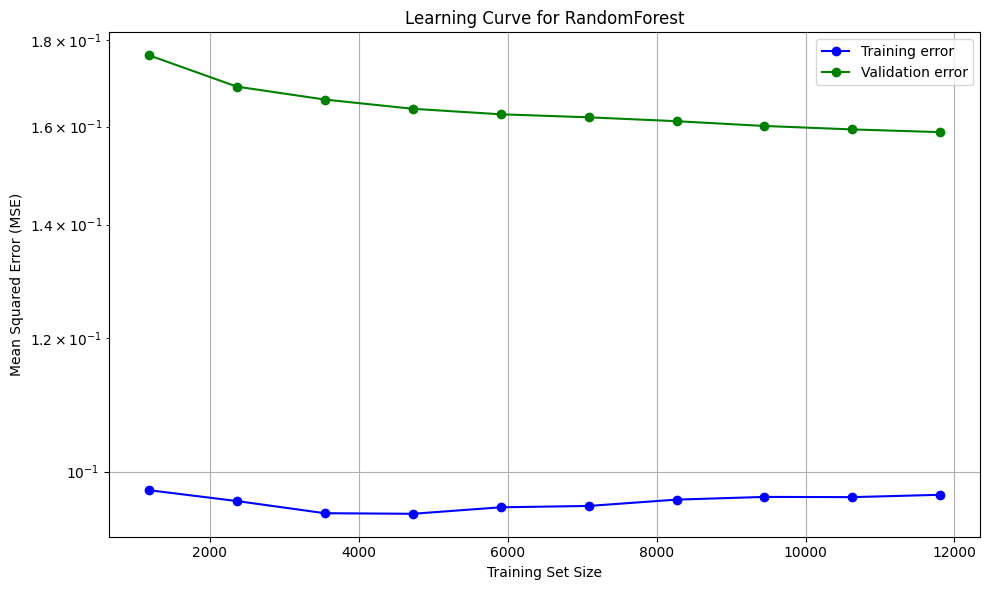

In [9]:
# ----------------- Learning Curve -----------------
def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=5, scoring='neg_mean_squared_error'):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    val_scores_mean = -np.mean(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training error")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="green", label="Validation error")
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.yscale('log')
    plt.legend(loc="best")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_learning_curve(rf_model, X_train, y_train, title="Learning Curve for RandomForest")

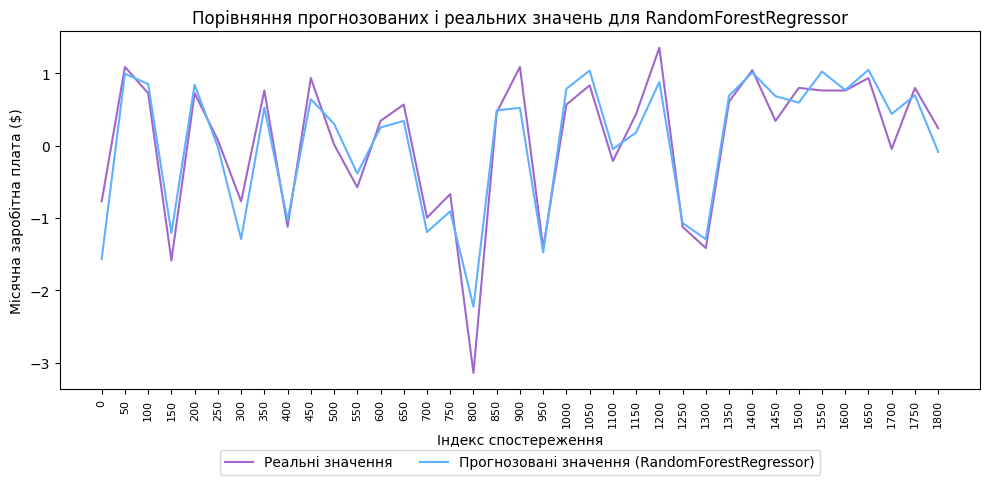

In [10]:
import numpy as np
import matplotlib.pyplot as plt

indexs = np.arange(0, len(y_val_pred), 50)

plt.figure(figsize=(10, 5))
plt.plot(indexs, y_val.values[indexs], label='Actual values', color='#A066CB')
plt.plot(indexs, y_val_pred[indexs], label='Predicted values (RandomForestRegressor)', color='#5EB1FF')

plt.xlabel("Observation index")
plt.xticks(indexs, rotation='vertical', fontsize=8)
plt.ylabel("Monthly salary ($)")
plt.title("Comparison of predicted and actual values for RandomForestRegressor")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.tight_layout()
plt.show()

#Randomized Search for  Random Forest Optimization (uncomment to use)

In [11]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# # Define the parameter grid
# param_dist = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [10, 20, 30, 40, None],
#     'max_features': ['auto', 'sqrt', 'log2', 0.5],
#     'min_samples_split': [2, 5, 10, 20],
#     'min_samples_leaf': [1, 2, 4, 10]
# }

# # Create RandomizedSearchCV object
# random_search = RandomizedSearchCV(
#     estimator=RandomForestRegressor(random_state=42),
#     param_distributions=param_dist,
#     n_iter=100,  # Number of parameter combinations to try
#     scoring='r2',  # Optimize for R^2 score
#     cv=5,  # 5-fold cross-validation
#     random_state=42,
#     n_jobs=-1  # Use all available CPU cores
# )

# # Fit RandomizedSearchCV
# random_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = random_search.best_params_
# print("Best hyperparameters:", best_params)

# # Use the best model for predictions
# best_rf_model = random_search.best_estimator_
# y_val_pred_rf_optimized = best_rf_model.predict(X_val)

# # Evaluate the optimized model on the validation set
# mse_rf_optimized = mean_squared_error(y_val, y_val_pred_rf_optimized)
# r2_rf_optimized = r2_score(y_val, y_val_pred_rf_optimized)

# print(f"Optimized Mean Squared Error (Validation): {mse_rf_optimized}")
# print(f"Optimized R^2 Score (Validation): {r2_rf_optimized}")


# DecisionTreeRegressor

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.base import clone

print("_____________DecisionTreeRegressor___________________")

# ---------- Metrics function ----------
def calculate_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / np.where(y_true != 0, y_true, 1))) * 100

    print(f"Metrics for {dataset_name}:")
    print(f"  MSE:  {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  R²:   {r2:.4f}")
    print(f"  MAPE: {mape:.2f}%")
    print("--------------------------------------")

# ---------- Model & Training ----------
params = {
    'min_samples_split': 15,
    'min_samples_leaf': 20,
    'max_features': None,
    'max_depth': 10,
    'random_state': 42
}
dt_model = DecisionTreeRegressor(**params)
dt_model.fit(X_train, y_train)

# ---------- Predictions ----------
y_train_pred = dt_model.predict(X_train)
y_val_pred = dt_model.predict(X_val)
y_test_pred = dt_model.predict(X_test)

# ---------- Metrics ----------
calculate_metrics(y_train, y_train_pred, "Training Data")
calculate_metrics(y_val, y_val_pred, "Validation Data")
calculate_metrics(y_test, y_test_pred, "Test Data")


!!!_____________DecisionTreeRegressor START___________________
Metrics for Training Data:
  MSE:  0.1533
  RMSE: 0.3915
  MAE:  0.3040
  R²:   0.8462
  MAPE: 131.90%
--------------------------------------
Metrics for Validation Data:
  MSE:  0.1748
  RMSE: 0.4181
  MAE:  0.3268
  R²:   0.8275
  MAPE: 109.13%
--------------------------------------
Metrics for Test Data:
  MSE:  0.1775
  RMSE: 0.4213
  MAE:  0.3266
  R²:   0.8250
  MAPE: 146.38%
--------------------------------------


In [13]:
# ---------- Cross-validation ----------
def cross_validate_metrics(estimator, X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    mse_list, rmse_list, mae_list, r2_list, mape_list = [], [], [], [], []

    for train_idx, val_idx in kf.split(X):
        X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
        y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

        model = clone(estimator)
        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val_fold)

        mse = mean_squared_error(y_val_fold, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_val_fold, y_pred)
        r2 = r2_score(y_val_fold, y_pred)
        mape = np.mean(np.abs((y_val_fold - y_pred) / np.where(y_val_fold != 0, y_val_fold, 1))) * 100

        mse_list.append(mse)
        rmse_list.append(rmse)
        mae_list.append(mae)
        r2_list.append(r2)
        mape_list.append(mape)

    print("Cross-Validation Metrics (mean ± std):")
    print(f"  MSE:  {np.mean(mse_list):.4f} ± {np.std(mse_list):.4f}")
    print(f"  RMSE: {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
    print(f"  MAE:  {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
    print(f"  R²:   {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")
    print(f"  MAPE: {np.mean(mape_list):.2f}% ± {np.std(mape_list):.2f}%")
    print("---------------------------------------------------")

cross_validate_metrics(dt_model, X_train, y_train, cv=5)


Cross-Validation Metrics (mean ± std):
  MSE:  0.1736 ± 0.0059
  RMSE: 0.4165 ± 0.0071
  MAE:  0.3226 ± 0.0052
  R²:   0.8257 ± 0.0051
  MAPE: 140.93% ± 13.75%
---------------------------------------------------


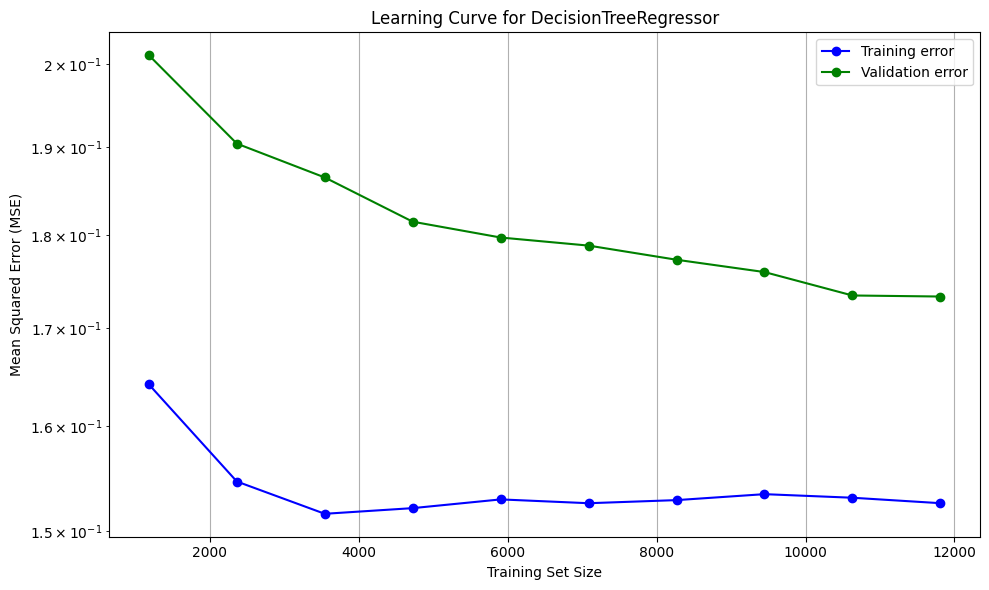

In [14]:

# ---------- Learning Curve ----------
def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=5, scoring='neg_mean_squared_error'):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    val_scores_mean = -np.mean(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training error")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="green", label="Validation error")
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.legend(loc="best")
    plt.grid(True)
    plt.yscale('log')
    plt.tight_layout()
    plt.show()

plot_learning_curve(dt_model, X_train, y_train, title="Learning Curve for DecisionTreeRegressor")

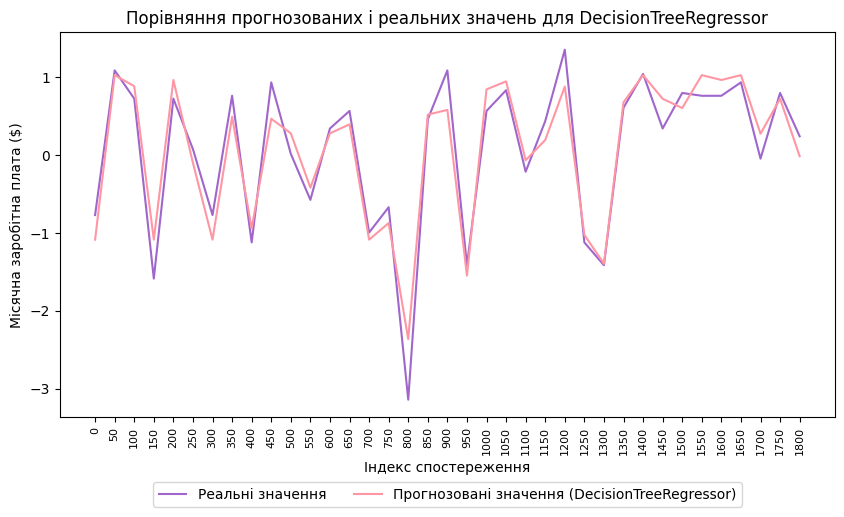

Mean Squared Error: 0.1748318222922609
R^2 Score: 0.8274964130123112


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

y_val_pred_dt = dt_model.predict(X_val)

indexs = np.arange(0, len(y_val_pred_dt), 50)

plt.figure(figsize=(10, 5))
plt.plot(indexs, y_val.values[indexs], label='Actual values', color='#A066CB')
plt.plot(indexs, y_val_pred_dt[indexs], label='Predicted values (DecisionTreeRegressor)', color='#FF96A3')

plt.xlabel("Observation index")
plt.xticks(indexs, rotation='vertical', fontsize=8)
plt.ylabel("Monthly salary ($)")
plt.title("Comparison of predicted and actual values for DecisionTreeRegressor")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.show()

# Metrics calculation
mse_dt = mean_squared_error(y_val, y_val_pred_dt)
r2_dt = r2_score(y_val, y_val_pred_dt)

print(f"Mean Squared Error: {mse_dt}")
print(f"R^2 Score: {r2_dt}")

#Using Randomized SearchCV for Optimization DecisionTreeRegressor (uncomment to use)

In [16]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

print("??? DecisionTreeRegressor start")
# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 10, 12, 15, 20],
    'min_samples_leaf': [1, 5, 10, 15, 20],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.7, 1.0]
}

# Initialize the DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,       # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,  # Use all available cores
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters DecisionTreeRegressor from GridSearchCV:", best_params)

# GradientBoostingRegressor

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.base import clone

print("_____________GradientBoostingRegressor___________________")

# ---------- Metrics function ----------
def calculate_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / np.where(y_true != 0, y_true, 1))) * 100

    print(f"Metrics for {dataset_name}:")
    print(f"  MSE:  {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  R²:   {r2:.4f}")
    print(f"  MAPE: {mape:.2f}%")
    print("--------------------------------------")

# ---------- Model & Training ----------
params = {
    'subsample': 0.8,
    'n_estimators': 400,
    'min_samples_split': 10,
    'min_samples_leaf': 10,
    'max_features': 0.7,
    'max_depth': 5,
    'loss': 'squared_error',
    'learning_rate': 0.05,
    'random_state': 42
}

gb_model = GradientBoostingRegressor(**params)
gb_model.fit(X_train, y_train)

# ---------- Predictions ----------
y_train_pred = gb_model.predict(X_train)
y_val_pred = gb_model.predict(X_val)
y_test_pred = gb_model.predict(X_test)

# ---------- Metrics ----------
calculate_metrics(y_train, y_train_pred, "Training Data")
calculate_metrics(y_val, y_val_pred, "Validation Data")
calculate_metrics(y_test, y_test_pred, "Test Data")


_____________GradientBoostingRegressor START___________________
Metrics for Training Data:
  MSE:  0.1230
  RMSE: 0.3507
  MAE:  0.2723
  R²:   0.8766
  MAPE: 119.06%
--------------------------------------
Metrics for Validation Data:
  MSE:  0.1544
  RMSE: 0.3929
  MAE:  0.3042
  R²:   0.8477
  MAPE: 100.20%
--------------------------------------
Metrics for Test Data:
  MSE:  0.1554
  RMSE: 0.3943
  MAE:  0.3041
  R²:   0.8468
  MAPE: 145.92%
--------------------------------------


In [18]:
# ---------- Cross-validation ----------
def cross_validate_metrics(estimator, X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    mse_list, rmse_list, mae_list, r2_list, mape_list = [], [], [], [], []

    for train_idx, val_idx in kf.split(X):
        X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
        y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

        model = clone(estimator)
        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val_fold)

        mse = mean_squared_error(y_val_fold, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_val_fold, y_pred)
        r2 = r2_score(y_val_fold, y_pred)
        mape = np.mean(np.abs((y_val_fold - y_pred) / np.where(y_val_fold != 0, y_val_fold, 1))) * 100

        mse_list.append(mse)
        rmse_list.append(rmse)
        mae_list.append(mae)
        r2_list.append(r2)
        mape_list.append(mape)

    print("Cross-Validation Metrics (mean ± std):")
    print(f"  MSE:  {np.mean(mse_list):.4f} ± {np.std(mse_list):.4f}")
    print(f"  RMSE: {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
    print(f"  MAE:  {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
    print(f"  R²:   {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")
    print(f"  MAPE: {np.mean(mape_list):.2f}% ± {np.std(mape_list):.2f}%")
    print("---------------------------------------------------")

cross_validate_metrics(gb_model, X_train, y_train, cv=5)

Cross-Validation Metrics (mean ± std):
  MSE:  0.1546 ± 0.0052
  RMSE: 0.3932 ± 0.0066
  MAE:  0.3023 ± 0.0048
  R²:   0.8447 ± 0.0045
  MAPE: 131.60% ± 15.84%
---------------------------------------------------


In [19]:
# ---------- Learning Curve ----------
def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=5, scoring='neg_mean_squared_error'):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    val_scores_mean = -np.mean(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training error")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="green", label="Validation error")
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.legend(loc="best")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_learning_curve(gb_model, X_train, y_train, title="Learning Curve for GradientBoostingRegressor")

KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

y_val_pred_gb = gb_model.predict(X_val)

indexs = np.arange(0, len(y_val_pred_gb), 50)

plt.figure(figsize=(10, 5))
plt.plot(indexs, y_val.values[indexs], label='Actual values', color='#A066CB')
plt.plot(indexs, y_val_pred_gb[indexs], label='Predicted values (GradientBoostingRegressor)', color='#FF96A3')

plt.xlabel("Observation index")
plt.xticks(indexs, rotation='vertical', fontsize=8)
plt.ylabel("Monthly salary ($)")
plt.title("Comparison of predicted and actual values for GradientBoostingRegressor")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.show()

mse_gb = mean_squared_error(y_val, y_val_pred_gb)
r2_gb = r2_score(y_val, y_val_pred_gb)

print(f"Mean Squared Error: {mse_gb}")
print(f"R^2 Score: {r2_gb}")

#Using Randomized Search for Optimization GradientBoostingRegressor

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np

# param_dist = {
#     'n_estimators': [50, 100, 200, 300],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'max_depth': [3, 5, 7, 10],
#     'min_samples_split': [2, 5, 10, 20],
#     'min_samples_leaf': [1, 2, 5, 10],
#     'subsample': [0.6, 0.8, 1.0],
#     'max_features': [None, 'sqrt', 'log2']
# }

# random_search = RandomizedSearchCV(
#     estimator=GradientBoostingRegressor(random_state=42),
#     param_distributions=param_dist,
#     n_iter=100,  # Number of parameter combinations to try
#     scoring='r2',  # Optimize for R^2 score
#     cv=5,  # 5-fold cross-validation
#     random_state=42,
#     n_jobs=-1  # Use all available cores
# )

# random_search.fit(X_train, y_train)

# best_params = random_search.best_params_
# best_score = random_search.best_score_

# print("Best hyperparameters:", best_params)
# print("Best R^2 score during CV:", best_score)



In [ ]:
# best_gb_model = random_search.best_estimator_
# y_val_pred_gb_optimized = best_gb_model.predict(X_val)

# mse_gb_optimized = mean_squared_error(y_val, y_val_pred_gb_optimized)
# r2_gb_optimized = r2_score(y_val, y_val_pred_gb_optimized)

# print(f"Optimized Mean Squared Error: {mse_gb_optimized}")
# print(f"Optimized R^2 Score: {r2_gb_optimized}")


# Neural Networks (MLPRegressor)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold, learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.base import clone

print("_____________Neural Networks (MLPRegressor)___________________")

# ---------- Metrics function ----------
def calculate_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / np.where(y_true != 0, y_true, 1))) * 100

    print(f"Metrics for {dataset_name}:")
    print(f"  MSE:  {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  R²:   {r2:.4f}")
    print(f"  MAPE: {mape:.2f}%")
    print("--------------------------------------")

# ---------- Model & Training ----------
mlpr_model = MLPRegressor(
    solver='sgd',
    max_iter=500,
    learning_rate_init=0.01,
    hidden_layer_sizes=(100, 100),
    alpha=0.01,
    activation='tanh',
    random_state=42
)
mlpr_model.fit(X_train, y_train)

# ---------- Predictions ----------
y_train_pred = mlpr_model.predict(X_train)
y_val_pred = mlpr_model.predict(X_val)
y_test_pred = mlpr_model.predict(X_test)

# ---------- Metrics ----------
calculate_metrics(y_train, y_train_pred, "Training Data")
calculate_metrics(y_val, y_val_pred, "Validation Data")
calculate_metrics(y_test, y_test_pred, "Test Data")

_____________Neural Networks (MLPRegressor)___________________
Metrics for Training Data:
  MSE:  0.1475
  RMSE: 0.3841
  MAE:  0.2971
  R²:   0.8520
  MAPE: 124.44%
--------------------------------------
Metrics for Validation Data:
  MSE:  0.1574
  RMSE: 0.3968
  MAE:  0.3086
  R²:   0.8447
  MAPE: 100.29%
--------------------------------------
Metrics for Test Data:
  MSE:  0.1613
  RMSE: 0.4016
  MAE:  0.3102
  R²:   0.8410
  MAPE: 127.48%
--------------------------------------


In [ ]:
# ---------- Cross-validation ----------
def cross_validate_metrics(estimator, X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    mse_list, rmse_list, mae_list, r2_list, mape_list = [], [], [], [], []

    for train_idx, val_idx in kf.split(X):
        X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
        y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

        model = clone(estimator)
        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val_fold)

        mse = mean_squared_error(y_val_fold, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_val_fold, y_pred)
        r2 = r2_score(y_val_fold, y_pred)
        mape = np.mean(np.abs((y_val_fold - y_pred) / np.where(y_val_fold != 0, y_val_fold, 1))) * 100

        mse_list.append(mse)
        rmse_list.append(rmse)
        mae_list.append(mae)
        r2_list.append(r2)
        mape_list.append(mape)

    print("Cross-Validation Metrics (mean ± std):")
    print(f"  MSE:  {np.mean(mse_list):.4f} ± {np.std(mse_list):.4f}")
    print(f"  RMSE: {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
    print(f"  MAE:  {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
    print(f"  R²:   {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")
    print(f"  MAPE: {np.mean(mape_list):.2f}% ± {np.std(mape_list):.2f}%")
    print("---------------------------------------------------")

cross_validate_metrics(mlpr_model, X_train, y_train, cv=5)

In [ ]:
# ---------- Learning Curve ----------
def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=5, scoring='neg_mean_squared_error'):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    val_scores_mean = -np.mean(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training error")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="green", label="Validation error")
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.legend(loc="best")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_learning_curve(mlpr_model, X_train, y_train, title="Learning Curve for MLPRegressor")


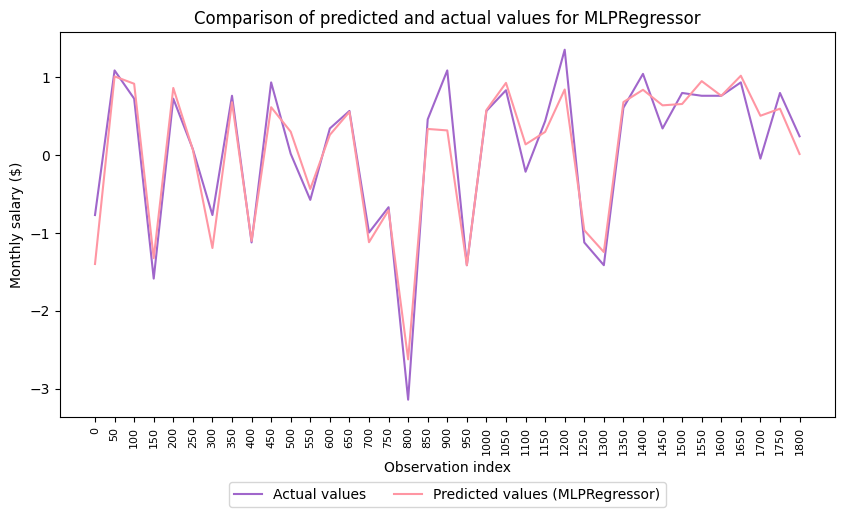

Mean Squared Error: 0.15743149906771628
R^2 Score: 0.8446650161397293


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Get predicted values for the validation set
y_val_pred_mlpr = mlpr_model.predict(X_val)

# Build a plot to compare predicted and actual values
indexs = np.arange(0, len(y_val_pred_mlpr), 50)  # Select every 50th value for clarity

plt.figure(figsize=(10, 5))
plt.plot(indexs, y_val.values[indexs], label='Actual values', color='#A066CB')
plt.plot(indexs, y_val_pred_mlpr[indexs], label='Predicted values (MLPRegressor)', color='#FF96A3')

plt.xlabel("Observation index")
plt.xticks(indexs, rotation='vertical', fontsize=8)
plt.ylabel("Monthly salary ($)")
plt.title("Comparison of predicted and actual values for MLPRegressor")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.show()

# Metrics calculation
mse_mlpr = mean_squared_error(y_val, y_val_pred_mlpr)
r2_mlpr = r2_score(y_val, y_val_pred_mlpr)

print(f"Mean Squared Error: {mse_mlpr}")
print(f"R^2 Score: {r2_mlpr}")

#GridSearchCV MLPRegressor

In [ ]:
# import numpy as np
# from sklearn.neural_network import MLPRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.model_selection import GridSearchCV

# # Define parameter grid for GridSearchCV
# param_grid = {
#     'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100), (100, 50)],
#     'activation': ['relu', 'tanh', 'logistic'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.001, 0.01, 0.1],
#     'learning_rate_init': [0.001, 0.01, 0.05, 0.1],
#     'max_iter': [500, 1000]
# }
# # Initialize the MLPRegressor
# mlpr = MLPRegressor(random_state=42)

# # Set up GridSearchCV
# grid_search = GridSearchCV(
#     estimator=mlpr,
#     param_grid=param_grid,
#     cv=5,       # 5-fold cross-validation
#     scoring='neg_mean_squared_error',
#     n_jobs=-1,  # Use all available cores
# )

# # Fit GridSearchCV
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("!!!Best parameters Neural Networks (MLPRegressor) from GridSearchCV:", best_params)

# # Train the model with the best parameters
# mlpr_model = MLPRegressor(**best_params, random_state=42)
# mlpr_model.fit(X_train, y_train)

# print("_____________Neural Networks (MLPRegressor)___________________")

# # Prediction and evaluation for training data
# y_train_pred_mlpr = mlpr_model.predict(X_train)
# mse_train = mean_squared_error(y_train, y_train_pred_mlpr)
# r2_train = r2_score(y_train, y_train_pred_mlpr)
# print(f"MSE for training data: {mse_train}")
# print(f"R² Score for training data: {r2_train}")

# # Prediction and evaluation for validation data
# y_val_pred_mlpr = mlpr_model.predict(X_val)
# mse_val = mean_squared_error(y_val, y_val_pred_mlpr)
# r2_val = r2_score(y_val, y_val_pred_mlpr)
# print(f"MSE for validation data: {mse_val}")
# print(f"R² Score for validation data: {r2_val}")

# # Prediction and evaluation for test data
# y_test_pred_mlpr = mlpr_model.predict(X_test)
# mse_test = mean_squared_error(y_test, y_test_pred_mlpr)
# r2_test = r2_score(y_test, y_test_pred_mlpr)
# print(f"MSE for test data: {mse_test}")
# print(f"R² Score for test data: {r2_test}")

# print("______________________________________")

# XBoost

In [22]:
!pip install xgboost

In [23]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import learning_curve, KFold
from sklearn.base import clone
import matplotlib.pyplot as plt
import numpy as np

# ----------------- Parameters -----------------
params = {
    'subsample': 0.8,
    'reg_lambda': 1,
    'reg_alpha': 0,
    'n_estimators': 300,
    'max_depth': 5,
    'learning_rate': 0.05,
    'gamma': 0.2,
    'colsample_bytree': 0.8,
    'random_state': 42,
    'n_jobs': -1
}
xgb_model = XGBRegressor(**params)

# ----------------- Metrics function -----------------
def calculate_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / np.where(y_true != 0, y_true, 1))) * 100

    print(f"Metrics for {dataset_name}:")
    print(f"  MSE:  {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  R²:   {r2:.4f}")
    print(f"  MAPE: {mape:.2f}%")
    print("--------------------------------------")

# ----------------- Training and evaluation -----------------
xgb_model.fit(X_train, y_train)

print("________________XGBoost______________________")
calculate_metrics(y_train, xgb_model.predict(X_train), "Training Data")
calculate_metrics(y_val, xgb_model.predict(X_val), "Validation Data")
calculate_metrics(y_test, xgb_model.predict(X_test), "Test Data")

________________XGBoost______________________
Metrics for Training Data:
  MSE:  0.1260
  RMSE: 0.3550
  MAE:  0.2762
  R²:   0.8735
  MAPE: 120.36%
--------------------------------------
Metrics for Validation Data:
  MSE:  0.1531
  RMSE: 0.3913
  MAE:  0.3033
  R²:   0.8489
  MAPE: 100.90%
--------------------------------------
Metrics for Test Data:
  MSE:  0.1560
  RMSE: 0.3949
  MAE:  0.3050
  R²:   0.8462
  MAPE: 143.37%
--------------------------------------


In [ ]:
# ----------------- Cross-validation -----------------
def cross_validate_metrics(estimator, X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    mse_list, rmse_list, mae_list, r2_list, mape_list = [], [], [], [], []

    for train_idx, val_idx in kf.split(X):
        X_train_fold, X_val_fold = X[train_idx], X[val_idx]
        y_train_fold, y_val_fold = y[train_idx], y[val_idx]

        model = clone(estimator)
        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val_fold)

        mse = mean_squared_error(y_val_fold, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_val_fold, y_pred)
        r2 = r2_score(y_val_fold, y_pred)
        mape = np.mean(np.abs((y_val_fold - y_pred) / np.where(y_val_fold != 0, y_val_fold, 1))) * 100

        mse_list.append(mse)
        rmse_list.append(rmse)
        mae_list.append(mae)
        r2_list.append(r2)
        mape_list.append(mape)

    print("Cross-Validation Metrics (mean ± std):")
    print(f"  MSE:  {np.mean(mse_list):.4f} ± {np.std(mse_list):.4f}")
    print(f"  RMSE: {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
    print(f"  MAE:  {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
    print(f"  R²:   {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")
    print(f"  MAPE: {np.mean(mape_list):.2f}% ± {np.std(mape_list):.2f}%")
    print("---------------------------------------------------")

cross_validate_metrics(xgb_model, X_train.values, y_train.values, cv=5)

In [ ]:
# ----------------- Learning Curve -----------------
def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=5, scoring='neg_mean_squared_error'):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    val_scores_mean = -np.mean(val_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training error")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="green", label="Validation error")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="blue")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="green")
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.legend(loc="best")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_learning_curve(xgb_model, X_train, y_train, title="Learning Curve for XGBoost")

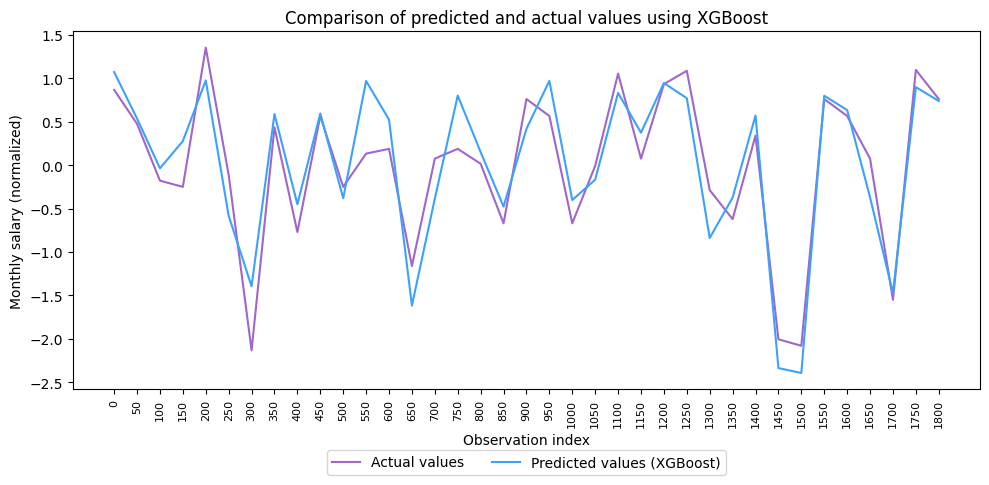

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Prediction for the test set
y_test_pred_xgb = xgb_model.predict(X_test)

# Select indices to display every N-th value
indexs = np.arange(0, len(y_test_pred_xgb), 50)

# Plotting the graph
plt.figure(figsize=(10, 5))
plt.plot(indexs, y_test.values[indexs], label='Actual values', color='#A066CB')
plt.plot(indexs, y_test_pred_xgb[indexs], label='Predicted values (XGBoost)', color='#3BA1FF')

plt.xlabel("Observation index")
plt.xticks(indexs, rotation='vertical', fontsize=8)
plt.ylabel("Monthly salary (normalized)")
plt.title("Comparison of predicted and actual values using XGBoost")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.tight_layout()
plt.show()

#XGBoost GridSearch

In [ ]:
# import numpy as np
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 300],
#     'max_depth': [3, 7],
#     'learning_rate': [0.05, 0.1],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'gamma': [0, 0.1],
#     'reg_alpha': [0, 0.1],
#     'reg_lambda': [1, 10]
# }

# # Initialize the XGBRegressor
# xgb = XGBRegressor(random_state=42)

# # Set up GridSearchCV
# grid_search = GridSearchCV(
#     estimator=xgb,
#     param_grid=param_grid,
#     cv=5,       # 5-fold cross-validation
#     scoring='neg_mean_squared_error',
#     n_jobs=-1,  # Use all available cores
# )

# # Fit GridSearchCV
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best parameters XGBRegressor from GridSearchCV:", best_params)

# # Train the model with the best parameters
# xgb_model = XGBRegressor(**best_params, random_state=42)
# xgb_model.fit(X_train, y_train)

# # Predictions and evaluation
# y_train_pred_xgb = xgb_model.predict(X_train)
# mse_train_xgb = mean_squared_error(y_train, y_train_pred_xgb)
# r2_train_xgb = r2_score(y_train, y_train_pred_xgb)

# y_val_pred_xgb = xgb_model.predict(X_val)
# mse_val_xgb = mean_squared_error(y_val, y_val_pred_xgb)
# r2_val_xgb = r2_score(y_val, y_val_pred_xgb)

# y_test_pred_xgb = xgb_model.predict(X_test)
# mse_test_xgb = mean_squared_error(y_test, y_test_pred_xgb)
# r2_test_xgb = r2_score(y_test, y_test_pred_xgb)

# print("________________XGBoost______________________")

# print(f"MSE for training data (XGBoost): {mse_train_xgb}")
# print(f"MSE for validation data (XGBoost): {mse_val_xgb}")
# print(f"MSE for test data (XGBoost): {mse_test_xgb}")

# print("______________________________________")

# print(f"R² Score for training data (XGBoost): {r2_train_xgb}")
# print(f"R² Score for validation data (XGBoost): {r2_val_xgb}")
# print(f"R² Score for test data (XGBoost): {r2_test_xgb}")

#CatBoostRegressor

In [25]:
!pip install catboost lightgbm xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.3 MB/s eta 0:00:00


In [26]:
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import learning_curve, KFold
from sklearn.base import clone
import matplotlib.pyplot as plt
import numpy as np

print("!!!________________CatBoost______________________")

# ----------------- Parameters -----------------
cat_params = {
    'subsample': 0.8,
    'learning_rate': 0.01,
    'l2_leaf_reg': 1,
    'iterations': 1500,
    'depth': 10,
    'colsample_bylevel': 1.0,
    'verbose': 0,
    'random_state': 42
}
cat_model = CatBoostRegressor(**cat_params)

# ----------------- Metrics function -----------------
def calculate_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / np.where(y_true != 0, y_true, 1))) * 100

    print(f"Metrics for {dataset_name}:")
    print(f"  MSE:  {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  R²:   {r2:.4f}")
    print(f"  MAPE: {mape:.2f}%")
    print("--------------------------------------")

# ----------------- Training and evaluation -----------------
cat_model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)

print("________________CatBoost______________________")
calculate_metrics(y_train, cat_model.predict(X_train), "Training Data")
calculate_metrics(y_val, cat_model.predict(X_val), "Validation Data")
calculate_metrics(y_test, cat_model.predict(X_test), "Test Data")

!!!________________CatBoost______________________
________________CatBoost______________________
Metrics for Training Data:
  MSE:  0.1089
  RMSE: 0.3301
  MAE:  0.2573
  R²:   0.8907
  MAPE: 113.34%
--------------------------------------
Metrics for Validation Data:
  MSE:  0.1535
  RMSE: 0.3918
  MAE:  0.3035
  R²:   0.8485
  MAPE: 101.59%
--------------------------------------
Metrics for Test Data:
  MSE:  0.1556
  RMSE: 0.3945
  MAE:  0.3044
  R²:   0.8466
  MAPE: 135.97%
--------------------------------------


In [ ]:
# ----------------- Cross-validation -----------------
def cross_validate_metrics(estimator, X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    mse_list, rmse_list, mae_list, r2_list, mape_list = [], [], [], [], []

    for train_idx, val_idx in kf.split(X):
        X_train_fold, X_val_fold = X[train_idx], X[val_idx]
        y_train_fold, y_val_fold = y[train_idx], y[val_idx]

        model = clone(estimator)
        model.fit(X_train_fold, y_train_fold, early_stopping_rounds=50, eval_set=(X_val_fold, y_val_fold), verbose=0)
        y_pred = model.predict(X_val_fold)

        mse = mean_squared_error(y_val_fold, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_val_fold, y_pred)
        r2 = r2_score(y_val_fold, y_pred)
        mape = np.mean(np.abs((y_val_fold - y_pred) / np.where(y_val_fold != 0, y_val_fold, 1))) * 100

        mse_list.append(mse)
        rmse_list.append(rmse)
        mae_list.append(mae)
        r2_list.append(r2)
        mape_list.append(mape)

    print("Cross-Validation Metrics (mean ± std):")
    print(f"  MSE:  {np.mean(mse_list):.4f} ± {np.std(mse_list):.4f}")
    print(f"  RMSE: {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
    print(f"  MAE:  {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
    print(f"  R²:   {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")
    print(f"  MAPE: {np.mean(mape_list):.2f}% ± {np.std(mape_list):.2f}%")
    print("---------------------------------------------------")

cross_validate_metrics(cat_model, X_train.values, y_train.values, cv=5)

In [ ]:
# ----------------- Learning Curve -----------------
def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=5, scoring='neg_mean_squared_error'):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    val_scores_mean = -np.mean(val_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training error")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="green", label="Validation error")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="blue")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="green")
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.yscale('log')
    plt.ylabel("Mean Squared Error (MSE)")
    plt.legend(loc="best")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_learning_curve(cat_model, X_train, y_train, title="Learning Curve for CatBoost")

# ----------------- Feature Importances -----------------
feature_importances = cat_model.get_feature_importance()
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (CatBoost)")
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

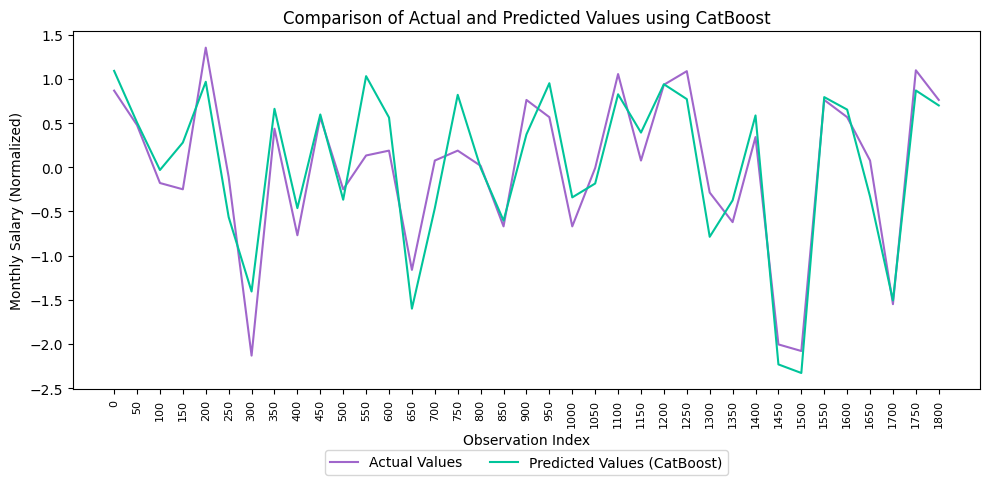

In [27]:
# ----------------- Plot: Actual vs Predicted -----------------
y_test_pred_cat = cat_model.predict(X_test)

# Select every N-th index to display
indexs = np.arange(0, len(y_test_pred_cat), 50)

plt.figure(figsize=(10, 5))
plt.plot(indexs, y_test.values[indexs], label='Actual Values', color='#A066CB')
plt.plot(indexs, y_test_pred_cat[indexs], label='Predicted Values (CatBoost)', color='#00C49A')

plt.xlabel("Observation Index")
plt.xticks(indexs, rotation='vertical', fontsize=8)
plt.ylabel("Monthly Salary (Normalized)")
plt.title("Comparison of Actual and Predicted Values using CatBoost")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.tight_layout()
plt.show()

# VotingRegressor

In [28]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import learning_curve, KFold
from sklearn.base import clone
import matplotlib.pyplot as plt
import numpy as np

# ----------------- Plot: Actual vs Predicted for Voting Regressor -----------------
voting_model = VotingRegressor([
    ('rf', rf_model),
    ('gb', gb_model),
    ('xgb', xgb_model),
    ('cat', cat_model)
], weights=[4, 3, 2, 1])

voting_model.fit(X_train, y_train)

# -----------------Сalculate Metrics -----------------
def calculate_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / np.where(y_true != 0, y_true, 1))) * 100

    print(f"Metrics for {dataset_name}:")
    print(f"  MSE:  {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  R²:   {r2:.4f}")
    print(f"  MAPE: {mape:.2f}%")
    print("--------------------------------------")

# ----------------- Results -----------------
calculate_metrics(y_train, voting_model.predict(X_train), "Training Data")
calculate_metrics(y_val, voting_model.predict(X_val), "Validation Data")
calculate_metrics(y_test, voting_model.predict(X_test), "Test Data")


Metrics for Training Data:
  MSE:  0.1089
  RMSE: 0.3300
  MAE:  0.2561
  R²:   0.8907
  MAPE: 113.01%
--------------------------------------
Metrics for Validation Data:
  MSE:  0.1531
  RMSE: 0.3912
  MAE:  0.3028
  R²:   0.8490
  MAPE: 101.45%
--------------------------------------
Metrics for Test Data:
  MSE:  0.1559
  RMSE: 0.3948
  MAE:  0.3051
  R²:   0.8463
  MAPE: 137.70%
--------------------------------------


In [ ]:
# ----------------- Cross-validation -----------------
def cross_validate_metrics(estimator, X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    mse_list, rmse_list, mae_list, r2_list, mape_list = [], [], [], [], []

    for train_idx, val_idx in kf.split(X):
        X_train_fold, X_val_fold = X[train_idx], X[val_idx]
        y_train_fold, y_val_fold = y[train_idx], y[val_idx]

        model = clone(estimator)
        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val_fold)

        mse = mean_squared_error(y_val_fold, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_val_fold, y_pred)
        r2 = r2_score(y_val_fold, y_pred)
        mape = np.mean(np.abs((y_val_fold - y_pred) / np.where(y_val_fold != 0, y_val_fold, 1))) * 100

        mse_list.append(mse)
        rmse_list.append(rmse)
        mae_list.append(mae)
        r2_list.append(r2)
        mape_list.append(mape)

    print("Cross-Validation Metrics (mean ± std):")
    print(f"  MSE:  {np.mean(mse_list):.4f} ± {np.std(mse_list):.4f}")
    print(f"  RMSE: {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
    print(f"  MAE:  {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
    print(f"  R²:   {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")
    print(f"  MAPE: {np.mean(mape_list):.2f}% ± {np.std(mape_list):.2f}%")
    print("---------------------------------------------------")

cross_validate_metrics(voting_model, X_train.values, y_train.values, cv=5)


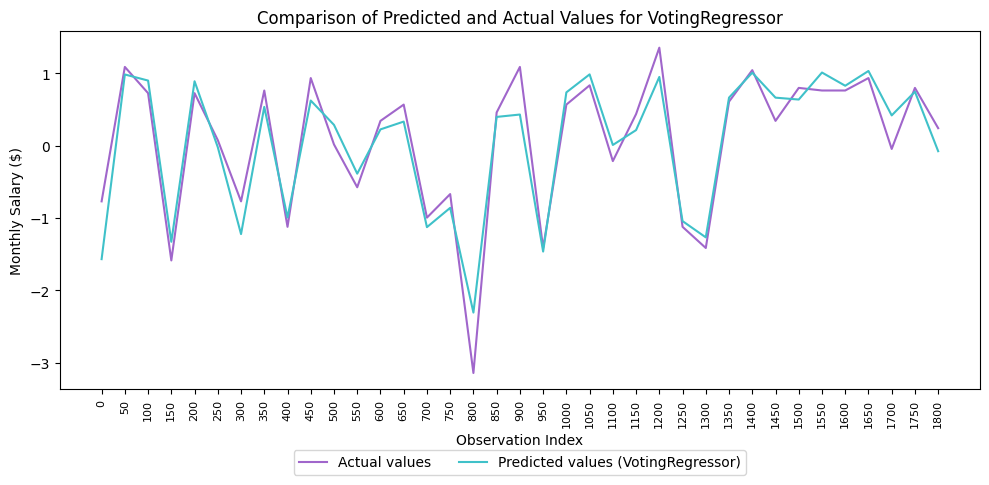

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Get predicted values for the validation set
y_val_pred_voting = voting_model.predict(X_val)

# Subsample every 50th point
indexes = np.arange(0, len(y_val_pred_voting), 50)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(indexes, y_val.values[indexes], label='Actual values', color='#A066CB')
plt.plot(indexes, y_val_pred_voting[indexes], label='Predicted values (VotingRegressor)', color='#3FC1C9')

plt.xlabel("Observation Index")
plt.xticks(indexes, rotation='vertical', fontsize=8)
plt.ylabel("Monthly Salary ($)")
plt.title("Comparison of Predicted and Actual Values for VotingRegressor")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.tight_layout()
plt.show()

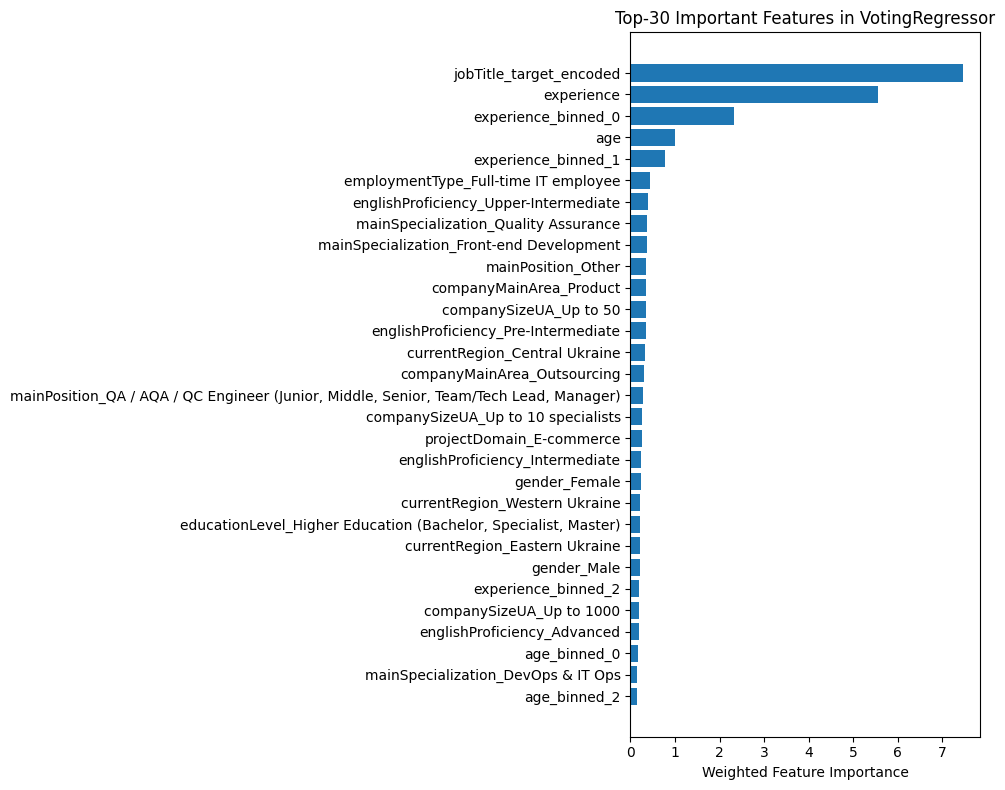

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Check which models have the feature_importances_ attribute
feature_importances = []
weights = [4, 3, 2, 1]
models = [rf_model, gb_model, xgb_model, cat_model]

for model, weight in zip(models, weights):
    if hasattr(model, 'feature_importances_'):
        feature_importances.append(weight * model.feature_importances_)

# Calculate weighted average importance
avg_importance = np.average(feature_importances, axis=0)

# Visualization
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': avg_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Top 30 features
top_n = 30
top_features = importance_df.head(top_n)

plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Weighted Feature Importance')
plt.title(f'Top-{top_n} Important Features in VotingRegressor')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# ----------------- Learning Curve -----------------
def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=5, scoring='neg_mean_squared_error'):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    val_scores_mean = -np.mean(val_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training error")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="green", label="Validation error")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="blue")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="green")
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.yscale('log')
    plt.ylabel("Mean Squared Error (MSE)")
    plt.legend(loc="best")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_learning_curve(voting_model, X_train, y_train, title="Learning Curve for VotingRegressor")


#CatBoost GridSearch

In [ ]:
# import numpy as np
# from catboost import CatBoostRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'iterations': [500, 1000],
#     'depth': [4, 6, 8],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'l2_leaf_reg': [1, 3, 5],
#     'subsample': [0.8, 1.0],
#     'colsample_bylevel': [0.8, 1.0]
# }

# # Initialize the CatBoostRegressor
# cat = CatBoostRegressor(random_seed=42, verbose=0)

# # Set up GridSearchCV
# grid_search = GridSearchCV(
#     estimator=cat,
#     param_grid=param_grid,
#     cv=5,       # 5-fold cross-validation
#     scoring='neg_mean_squared_error',
#     n_jobs=-1,  # Use all available cores
# )

# # Fit GridSearchCV
# grid_search.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50, verbose=0)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("!!!Best parameters CatBoostRegressor from GridSearchCV:", best_params)

# # Train the model with the best parameters
# cat_model = CatBoostRegressor(**best_params, random_seed=42, verbose=100)
# cat_model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)

# # Predictions
# y_train_pred_cat = cat_model.predict(X_train)
# y_val_pred_cat = cat_model.predict(X_val)
# y_test_pred_cat = cat_model.predict(X_test)

# # Metrics
# mse_train_cat = mean_squared_error(y_train, y_train_pred_cat)
# mse_val_cat = mean_squared_error(y_val, y_val_pred_cat)
# mse_test_cat = mean_squared_error(y_test, y_test_pred_cat)
# r2_train_cat = r2_score(y_train, y_train_pred_cat)
# r2_val_cat = r2_score(y_val, y_val_pred_cat)
# r2_test_cat = r2_score(y_test, y_test_pred_cat)

# print("CatBoost Results:")
# print(f"MSE Train: {mse_train_cat}, Val: {mse_val_cat}, Test: {mse_test_cat}")
# print(f"R² Train: {r2_train_cat}, Val: {r2_val_cat}, Test: {r2_test_cat}")

#Stacking Regressor

In [ ]:
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import learning_curve, KFold
from sklearn.base import clone
import matplotlib.pyplot as plt
import numpy as np

print("________________StackingRegressor______________________")

# ----------------- Model Building -----------------
estimators = [
    ('rf', rf_model),
    ('gb', gb_model),
    ('xgb', xgb_model)
]

stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=GradientBoostingRegressor(n_estimators=100, learning_rate=0.05),
    passthrough=False
)

stacking_model.fit(X_train, y_train)

# ----------------- Metrics Function -----------------
def calculate_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / np.where(y_true != 0, y_true, 1))) * 100

    print(f"Metrics for {dataset_name}:")
    print(f"  MSE:  {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  R²:   {r2:.4f}")
    print(f"  MAPE: {mape:.2f}%")
    print("--------------------------------------")

# ----------------- Evaluation -----------------
calculate_metrics(y_train, stacking_model.predict(X_train), "Training Data")
calculate_metrics(y_val, stacking_model.predict(X_val), "Validation Data")
calculate_metrics(y_test, stacking_model.predict(X_test), "Test Data")

In [ ]:
# ----------------- Cross-validation -----------------
def cross_validate_metrics(estimator, X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    mse_list, rmse_list, mae_list, r2_list, mape_list = [], [], [], [], []

    for train_idx, val_idx in kf.split(X):
        X_train_fold, X_val_fold = X[train_idx], X[val_idx]
        y_train_fold, y_val_fold = y[train_idx], y[val_idx]

        model = clone(estimator)
        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val_fold)

        mse = mean_squared_error(y_val_fold, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_val_fold, y_pred)
        r2 = r2_score(y_val_fold, y_pred)
        mape = np.mean(np.abs((y_val_fold - y_pred) / np.where(y_val_fold != 0, y_val_fold, 1))) * 100

        mse_list.append(mse)
        rmse_list.append(rmse)
        mae_list.append(mae)
        r2_list.append(r2)
        mape_list.append(mape)

    print("Cross-Validation Metrics (mean ± std):")
    print(f"  MSE:  {np.mean(mse_list):.4f} ± {np.std(mse_list):.4f}")
    print(f"  RMSE: {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
    print(f"  MAE:  {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
    print(f"  R²:   {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")
    print(f"  MAPE: {np.mean(mape_list):.2f}% ± {np.std(mape_list):.2f}%")
    print("---------------------------------------------------")

cross_validate_metrics(stacking_model, X_train.values, y_train.values, cv=5)

In [ ]:
# ----------------- Learning Curve -----------------
def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=5, scoring='neg_mean_squared_error'):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    val_scores_mean = -np.mean(val_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training error")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="green", label="Validation error")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="blue")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="green")
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.yscale('log')
    plt.ylabel("Mean Squared Error (MSE)")
    plt.legend(loc="best")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_learning_curve(stacking_model, X_train, y_train, title="Learning Curve for StackingRegressor")

#NN_model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Build model
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_initializer='he_normal', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.01)),
    Dense(1)
])

# Compile model
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Callbacks
early_stopping = EarlyStopping(patience=30, restore_best_weights=True, monitor='val_loss')
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)

# Training
history = nn_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=200,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping, lr_scheduler]
)

# Predictions
y_train_pred_nn = nn_model.predict(X_train_scaled).flatten()
y_val_pred_nn = nn_model.predict(X_val_scaled).flatten()
y_test_pred_nn = nn_model.predict(X_test_scaled).flatten()

# Metrics function
def print_metrics(y_true, y_pred, label):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / np.where(y_true != 0, y_true, 1))) * 100

    print(f"Metrics for {label}:")
    print(f"  MSE:  {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  R²:   {r2:.4f}")
    print(f"  MAPE: {mape:.2f}%")
    print("--------------------------------------")

print("______________Neural Network________________")
print_metrics(y_train, y_train_pred_nn, "Training")
print_metrics(y_val, y_val_pred_nn, "Validation")
print_metrics(y_test, y_test_pred_nn, "Test")

# Training loss plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#UI


In [31]:
import pandas as pd
import joblib
import urllib
from sklearn.preprocessing import StandardScaler

# Assuming combined_data, df_encoded, scaler, and rf_model are from your training script
# Extract unique values for categorical features
categorical_onehot = [
    'currentLocation', 'companyMainArea', 'currentRegion', 'employmentType',
    'jobTitle', 'mainPosition', 'projectDomain', 'mainSpecialization',
    'englishProficiency', 'companySizeUA', 'educationLevel', 'gender'
]
categorical_options = {}
for feature in categorical_onehot:
    # Get unique values, excluding NaN, and convert to list
    unique_values = combined_data[feature].dropna().unique().tolist()
    categorical_options[feature] = unique_values

# Save the categorical options
joblib.dump(categorical_options, 'categorical_options.joblib')

# Preprocess the data
# df_encoded, scaler,_ = preprocess_data(combined_data)

# Save the model
joblib.dump(rf_model, 'rf_model.joblib')

# Save the scaler
joblib.dump(scaler, 'scaler.joblib')

# Save the reference columns
reference_columns = df_encoded.columns.tolist()
joblib.dump(reference_columns, 'reference_columns.joblib')
combined_data.to_csv("train_data.csv", index=False)

In [32]:
!pip install streamlit pyngrok -q
!npm install localtunnel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 107.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.2 MB/s eta 0:00:00
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇
added 22 packages in 2s
⠇
⠇3 packages are looking for funding
⠇  run `npm fund` for details
⠇

##Interface

In [33]:
global_mean_salary = combined_data['salary'].mean()
joblib.dump(global_mean_salary, "global_mean_salary.joblib")

['global_mean_salary.joblib']

In [34]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import plotly.express as px
import numpy as np
from sklearn.preprocessing import StandardScaler
from preprocessing import preprocess_data
import logging

# Mapping for mainSpecialization normalization
main_specialization_mapping = {
    'Data Engineering & Analytics': 'Data Engineering & Analytics',
    'Front-end Development': 'Frontend Development',
    'Other': 'Other',
    'QA': 'QA',
    'bi-розробка': 'BI Development',
    'embeedded': 'Embedded Systems',
    'gameplay, back-end': 'Game Development (Back-end)',
    'gd': 'Game Development',
    'ml': 'Machine Learning',
    'salesforce': 'Salesforce',
    'support l1': 'Support (L1)',
    'sysadmin': 'System Administration',
    'ui логіка та шейдери в геймдеві, мабуть front-end': 'Game UI / Frontend',
    'vr': 'VR Development',
    'автоматизація процесів': 'Process Automation',
    'бібліотеки? десктоп?': 'Desktop / Library Development',
    'важко сказати': 'Unclear',
    'все підряд': 'Generalist',
    'генерація синтетичних даних для нейронок': 'Synthetic Data for ML',
    'не web': 'Non-Web Development',
    'розробка потрібного продукту. часом фронт, часом бек': 'Fullstack Development',
    'с++': 'C++ Development'
}


# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# ------------------------------
# Page configuration
# ------------------------------
st.set_page_config(
    page_title="Salary Predictor",
    page_icon="💰",
    layout="centered",
    initial_sidebar_state="expanded"
)

# ------------------------------
# Load pre-trained artifacts
# ------------------------------
rf_model = joblib.load("rf_model.joblib")
scaler = joblib.load("scaler.joblib")
reference_columns = joblib.load("reference_columns.joblib")
categorical_options = joblib.load("categorical_options.joblib")
target_encoder = joblib.load("target_encoder.joblib")
global_mean_salary = joblib.load("global_mean_salary.joblib")

# Dummy data loader (replace with your actual data loading function)
@st.cache_data
def load_data():
    return pd.read_csv("train_data.csv")  # Replace with actual path

# ------------------------------
# Theme toggle (manual CSS)
# ------------------------------
theme = st.sidebar.radio("🎨 Theme", ["Light", "Dark"])
if theme == "Dark":
    st.markdown(
        """
        <style>
        body, .main {
            background-color: #0e1117;
            color: #fafafa;
        }
        .stButton>button {
            background: #262730;
            color: #fafafa;
            border: 1px solid #fafafa;
        }
        .stSelectbox, .stNumberInput {
            background-color: #1e1e1e;
            color: #fafafa;
        }
        .stMetric { text-align: center; }
        .metric-box {
            border: 2px solid #888;
            border-radius: 8px;
            padding: 15px;
            text-align: center;
            margin: 5px;
            background: #333;
        }
        .metric-label {
            font-size: 16px;
            color: #fafafa;
            margin-bottom: 5px;
        }
        .metric-value {
            font-size: 24px;
            font-weight: bold;
            color: #fafafa;
        }
        </style>
        """, unsafe_allow_html=True
    )
else:
    st.markdown(
        """
        <style>
        .stButton>button {
            background: #4CAF50;
            color: white;
        }
        .stMetric { text-align: center; }
        .metric-box {
            border: 2px solid #888;
            border-radius: 8px;
            padding: 15px;
            text-align: center;
            margin: 5px;
            background: #fff;
        }
        .metric-label {
            font-size: 16px;
            color: #333;
            margin-bottom: 5px;
        }
        .metric-value {
            font-size: 24px;
            font-weight: bold;
            color: #000;
        }
        </style>
        """, unsafe_allow_html=True
    )

# ------------------------------
# App Header
# ------------------------------
st.markdown("<h1 style='text-align: center;'>💼 Salary Prediction App</h1>", unsafe_allow_html=True)
st.markdown("<p style='text-align: center;'>Fill in your professional info to get an estimated salary prediction.</p>", unsafe_allow_html=True)
st.markdown("---")

# ------------------------------
# Input collection
# ------------------------------
user_input = {}
col1, col2 = st.columns(2)

# Numerical inputs
numerical_features = ['age', 'experience']  # Salary is the target, not an input
with col1:
    user_input['age'] = st.number_input("📅 Age", min_value=18, max_value=100, value=30)
    user_input['experience'] = st.number_input("💼 Years of Experience", min_value=0, max_value=50, value=5)

# Categorical inputs
categorical_features = [
    'companyMainArea', 'currentRegion', 'employmentType', 'mainPosition',
    'projectDomain', 'mainSpecialization', 'englishProficiency',
    'companySizeUA', 'educationLevel', 'gender', 'jobTitle', 'currentLocation'
]
mid = len(categorical_features) // 2
for i, feature in enumerate(categorical_features):
    with (col1 if i < mid else col2):
        user_input[feature] = st.selectbox(f"🔘 {feature}", options=categorical_options.get(feature, ['Unknown']))

# ------------------------------
# Preprocessing and Prediction
# ----------------------
input_df = pd.DataFrame([user_input])
# Normalize mainSpecialization if present
if 'mainSpecialization' in input_df.columns:
    input_df['mainSpecialization'] = input_df['mainSpecialization'].map(
        main_specialization_mapping
    ).fillna('Other')

input_encoded, _, _ = preprocess_data(
    input_df,
    training=False,
    scaler=scaler,
    reference_columns=reference_columns,
    target_encoder=target_encoder,
    global_mean_salary=global_mean_salary
)

if 'salary' in input_encoded.columns:
    input_encoded = input_encoded.drop('salary', axis=1)

if st.button("🚀 Predict Salary"):
    try:
        with st.spinner("Predicting salary..."):
            # Get prediction
            prediction = rf_model.predict(input_encoded)

            # Inverse scaling for salary only
            numerical_features = ['salary', 'age', 'experience', 'jobTitle_target_encoded', 'currentLocation_target_encoded']
            salary_idx = numerical_features.index('salary')
            salary_mean = scaler.mean_[salary_idx]
            salary_scale = scaler.scale_[salary_idx]

            # Inverse transform: (prediction * scale) + mean
            original_prediction = (prediction * salary_scale) + salary_mean
            predicted_salary = np.expm1(original_prediction[0])  # Inverse log1p transformation
            st.success(f"💰 Estimated Salary: **${predicted_salary:,.2f}**")
    except Exception as e:
        st.error(f"An error occurred: {str(e)}")
        st.stop()

    # --------------------------
    # Analytics section
    # --------------------------
    train_df = load_data()
    logging.info(f"Columns in train_df: {train_df.columns.tolist()}")

    # Validate required columns
    required_columns = ['mainPosition', 'experience', 'salary']
    missing_columns = [col for col in required_columns if col not in train_df.columns]
    if missing_columns:
        st.error(f"Missing required columns in training data: {missing_columns}")
        st.stop()

    # Handle missing or invalid values
    train_df['experience'] = train_df['experience'].fillna(train_df['experience'].median())
    train_df['salary'] = train_df['salary'].fillna(train_df['salary'].median())
    train_df['salary'] = train_df['salary'].clip(lower=0)  # Ensure non-negative salaries
    logging.info(f"Salary range: {train_df['salary'].min()} to {train_df['salary'].max()}")
    logging.info(f"Salary unique values: {train_df['salary'].nunique()}")
    logging.info(f"Experience range: {train_df['experience'].min()} to {train_df['experience'].max()}")
    logging.info(f"Experience unique values: {train_df['experience'].nunique()}")

    filter_keys = ['mainPosition', 'experience'] # 'jobTitle', 'currentLocation', 'companyMainArea'
    filter_params = {}
    for key in filter_keys:
        if key in user_input:
            filter_params[key] = user_input[key]
        elif key == 'experience':
            filter_params[key] = user_input.get('experience', 5)

    filtered_df = train_df.copy()
    applied_filters = []
    for key, value in filter_params.items():
        if key in filtered_df.columns and value in filtered_df[key].unique():
            filtered_df = filtered_df[filtered_df[key] == value]
            applied_filters.append(f"{key}: {value}")


    if filtered_df.empty:
        st.warning("⚠️ Недостатньо даних для аналітики з такими параметрами.")
    else:
        st.subheader("📊 Position Analytics")
        st.markdown(f"**Applied Filters:** {', '.join(applied_filters) if applied_filters else 'None'}")

        # Metrics row 1
        col1, col2, col3 = st.columns(3)
        with col1:
            st.markdown(
                f'<div class="metric-box">'
                f'<div class="metric-label">Number of Records</div>'
                f'<div class="metric-value">{len(filtered_df)}</div>'
                f'</div>',
                unsafe_allow_html=True
            )
        with col2:
            st.markdown(
                f'<div class="metric-box">'
                f'<div class="metric-label">Average Salary</div>'
                f'<div class="metric-value">{filtered_df["salary"].mean():,.0f} USD</div>'
                f'</div>',
                unsafe_allow_html=True
            )
        with col3:
            st.markdown(
                f'<div class="metric-box">'
                f'<div class="metric-label">Median Salary</div>'
                f'<div class="metric-value">{filtered_df["salary"].median():,.0f} USD</div>'
                f'</div>',
                unsafe_allow_html=True
            )

        # Metrics row 2
        col4, col5 = st.columns(2)
        with col4:
            st.markdown(
                f'<div class="metric-box">'
                f'<div class="metric-label">Minimum Salary</div>'
                f'<div class="metric-value">{filtered_df["salary"].min():,.0f} USD</div>'
                f'</div>',
                unsafe_allow_html=True
            )
        with col5:
            st.markdown(
                f'<div class="metric-box">'
                f'<div class="metric-label">Maximum Salary</div>'
                f'<div class="metric-value">{filtered_df["salary"].max():,.0f} USD</div>'
                f'</div>',
                unsafe_allow_html=True
            )

        # Percentile calculation (compare raw salary to predicted salary)
        percentile = (filtered_df['salary'] <= predicted_salary).mean() * 100
        st.info(f"📈 Your predicted salary (${predicted_salary:,.0f}) is in the **{100 - percentile:.1f}%** top salaries.")

        # Salary trend by experience
        st.subheader(f"📈 Salary Trend for '{user_input['mainPosition']}' by Experience")
        position_df = train_df[train_df['mainPosition'] == user_input['mainPosition']]
        if position_df['experience'].nunique() > 1:
            position_trend = position_df.groupby('experience')['salary'].mean().reset_index()
            fig_trend = px.line(
                position_trend,
                x='experience',
                y='salary',
                title=f"Average Salary by Experience for '{user_input['mainPosition']}'",
                labels={'experience': 'Experience (Years)', 'salary': 'Average Salary, USD'},
                markers=True
            )
            st.plotly_chart(fig_trend, use_container_width=True)
        else:
            st.info("Not enough data to display experience-based salary trend for this position.")

        # Download CSV
        csv = filtered_df.to_csv(index=False)
        st.download_button("📥 Download CSV", data=csv, file_name="salary_analysis.csv", mime="text/csv")

# ------------------------------
# Footer
# ----------------------
st.markdown("---")
st.markdown("<p style='text-align: center; font-size: 13px;'>Made with ❤️ Sofiia</p>", unsafe_allow_html=True)

Writing app.py


##launch

In [35]:
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 34.85.216.21


In [36]:
!streamlit run app.py &>/content/logs.txt &

You need to load preprocessing.py, target.encoder

In [38]:
!npx localtunnel --port 8501

⠙your url is: https://plenty-rooms-agree.loca.lt
^C
